In [7]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
TSLA = yf.Ticker("TSLA")
print(TSLA)

yfinance.Ticker object <TSLA>


In [15]:
TSLA_data = TSLA.history(period="max")
TSLA_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-23 00:00:00-04:00,214.460007,221.479996,214.210007,220.320007,81525200,0.0,0.0
2024-08-26 00:00:00-04:00,218.750000,219.089996,211.009995,213.210007,59301200,0.0,0.0
2024-08-27 00:00:00-04:00,213.250000,215.660004,206.940002,209.210007,62821400,0.0,0.0


In [16]:
TSLA_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [100]:
TSLA_data.reset_index(inplace=True)

In [19]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [20]:
html_data  = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [21]:
soup = BeautifulSoup(html_data, 'html.parser')

In [22]:
title_content = soup.title.string
print(title_content)

Tesla Revenue 2010-2022 | TSLA | MacroTrends


In [23]:
tables = soup.find_all('table')
selected_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        selected_table = table
        break
if selected_table:
    print("Found the table containing 'Tesla Quarterly Revenue':")
    rows = selected_table.find_all('tr')
    for row in rows:
        cells = row.find_all(['td', 'th'])
        row_data = [cell.text.strip() for cell in cells]
        print (row_data)

else:
    print("Table containing 'Tesla Quarterly Revenue' not found.")

Found the table containing 'Tesla Quarterly Revenue':
['Tesla Quarterly Revenue(Millions of US $)']
['2022-09-30', '$21,454']
['2022-06-30', '$16,934']
['2022-03-31', '$18,756']
['2021-12-31', '$17,719']
['2021-09-30', '$13,757']
['2021-06-30', '$11,958']
['2021-03-31', '$10,389']
['2020-12-31', '$10,744']
['2020-09-30', '$8,771']
['2020-06-30', '$6,036']
['2020-03-31', '$5,985']
['2019-12-31', '$7,384']
['2019-09-30', '$6,303']
['2019-06-30', '$6,350']
['2019-03-31', '$4,541']
['2018-12-31', '$7,226']
['2018-09-30', '$6,824']
['2018-06-30', '$4,002']
['2018-03-31', '$3,409']
['2017-12-31', '$3,288']
['2017-09-30', '$2,985']
['2017-06-30', '$2,790']
['2017-03-31', '$2,696']
['2016-12-31', '$2,285']
['2016-09-30', '$2,298']
['2016-06-30', '$1,270']
['2016-03-31', '$1,147']
['2015-12-31', '$1,214']
['2015-09-30', '$937']
['2015-06-30', '$955']
['2015-03-31', '$940']
['2014-12-31', '$957']
['2014-09-30', '$852']
['2014-06-30', '$769']
['2014-03-31', '$621']
['2013-12-31', '$615']
['2013-0

In [24]:
if selected_table:
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in selected_table.find_all('tr'):
        data = row.find_all('td')
        if len(data) >= 2:  # Ensure there are at least two columns (Date and Revenue)
            date = data[0].text.strip()
            revenue = data[1].text
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    print(tesla_revenue)
else:
    print("Table containing 'Tesla Quarterly Revenue' not found.")

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

In [25]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [26]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [27]:
last_five_rows = tesla_revenue.tail(5)
print(last_five_rows)

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [62]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

In [63]:
import yfinance as yf

In [64]:
GME = yf.Ticker("GME")
print(GME)

yfinance.Ticker object <GME>


In [104]:
GME_data = GME.history(period="max")
GME_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-23 00:00:00-04:00,22.250000,22.620001,22.180000,22.209999,4056700,0.0,0.0
2024-08-26 00:00:00-04:00,22.250000,22.389999,21.299999,21.360001,4780500,0.0,0.0
2024-08-27 00:00:00-04:00,21.059999,21.290001,20.660000,20.740000,4118800,0.0,0.0


In [105]:
GME_data.reset_index(inplace=True)

In [106]:
GME_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [68]:
url=' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [70]:
html_data_2  = requests.get(url).text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [71]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [75]:
table = soup.find_all("tbody")[1]  # Isolate the desired table

# Extract the table data using BeautifulSoup and create a list of lists
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

# Create a pandas DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Convert the Date column to datetime format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

print(gme_revenue)

         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548
..        ...     ...
57 2006-01-31  $1,667
58 2005-10-31    $534
59 2005-07-31    $416
60 2005-04-30    $475
61 2005-01-31    $709

[62 rows x 2 columns]


In [78]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [79]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [80]:
last_five_rows = gme_revenue.tail(5)
print(last_five_rows)

         Date Revenue
57 2006-01-31    1667
58 2005-10-31     534
59 2005-07-31     416
60 2005-04-30     475
61 2005-01-31     709


In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [28]:
make_graph(TSLA_data, tesla_revenue, 'Tesla')

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

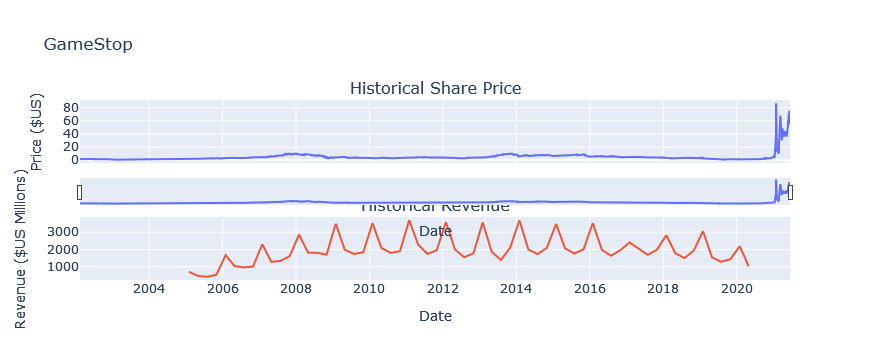

In [107]:
make_graph(GME_data, gme_revenue, 'GameStop')